In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_cs
import matplotlib as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

DIRNAME = os.path.join('/', 'kaggle', 'input', 'titanic')

TRAIN_DATA = pd.read_csv(os.path.join(DIRNAME, 'train.csv'))
TEST_DATA  = pd.read_csv(os.path.join(DIRNAME, 'test.csv' ))
GENDER_SUBMISSIONS = pd.read_csv(os.path.join(DIRNAME, 'gender_submission.csv' ))


#print(TRAIN_DATA[:3])

# Any results you write to the current directory are saved as output.

# Part 1:: Classification

In [2]:
# TRAIN_DATA.replace({'Sex': gender_mapping}, inplace=True)
# TEST_DATA .replace({'Sex': gender_mapping}, inplace=True)

TRAIN_DATA['is_male'] = TRAIN_DATA.apply(lambda row: row.Sex == 'male', axis=1)  
TEST_DATA ['is_male'] = TEST_DATA.apply(lambda row: row.Sex == 'male', axis=1)  

TRAIN_DATA['Embarked_C'] = TRAIN_DATA.apply(lambda row: row['Embarked'] == 'C', axis=1)  
TRAIN_DATA['Embarked_Q'] = TRAIN_DATA.apply(lambda row: row['Embarked'] == 'Q', axis=1)  
TRAIN_DATA['Embarked_S'] = TRAIN_DATA.apply(lambda row: row['Embarked'] == 'S', axis=1)  

TEST_DATA['Embarked_C'] = TEST_DATA.apply(lambda row: row.Embarked == 'C', axis=1)  
TEST_DATA['Embarked_Q'] = TEST_DATA.apply(lambda row: row.Embarked == 'Q', axis=1)  
TEST_DATA['Embarked_S'] = TEST_DATA.apply(lambda row: row.Embarked == 'S', axis=1)  


default_values = {'Age': 20, 'Fare': 20}
TRAIN_DATA.fillna(value=default_values, inplace=True)
TEST_DATA.fillna(value=default_values, inplace=True)

print('Is Data Null', TRAIN_DATA.isna(), TEST_DATA.isna())

# TRAIN_DATA['Sex'].apply(lambda x: 1 if x == 'male' else 0 )
# TEST_DATA ['Sex'].apply(lambda x: 1 if x == 'male' else 0 )
#TRAIN_DATA['Embarked'].apply(lambda x: ord(x))

print("* TRAIN_DATA.head()", TRAIN_DATA.head(), sep="\n", end="\n\n")
print("* TEST_DATA.head()" , TEST_DATA.head(), sep="\n", end="\n\n")
print("Train")
print(TRAIN_DATA)


Is Data Null      PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False  False  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Ca

In [3]:
# features = ['Pclass', 'is_male', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
features = ['Pclass', 'is_male', 'Age', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']



y = TRAIN_DATA['Survived']
X = TRAIN_DATA[features]

# y_test = TEST_DATA['Survived']
# X_TEST = TEST_DATA[features]

X.fillna(X.mean(), inplace=True)
print(X.dtypes)

print(X.head())
print(y.head())
print("Nans")
print(X)

Pclass          int64
is_male          bool
Age           float64
Fare          float64
Embarked_C       bool
Embarked_Q       bool
Embarked_S       bool
dtype: object
   Pclass  is_male   Age     Fare  Embarked_C  Embarked_Q  Embarked_S
0       3     True  22.0   7.2500       False       False        True
1       1    False  38.0  71.2833        True       False       False
2       3    False  26.0   7.9250       False       False        True
3       1    False  35.0  53.1000       False       False        True
4       3     True  35.0   8.0500       False       False        True
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
Nans
     Pclass  is_male   Age     Fare  Embarked_C  Embarked_Q  Embarked_S
0         3     True  22.0   7.2500       False       False        True
1         1    False  38.0  71.2833        True       False       False
2         3    False  26.0   7.9250       False       False        True
3         1    False  35.0  53.1000       False       F

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [4]:
from sklearn import tree

dt1 = tree.DecisionTreeClassifier(min_samples_split=100, random_state=99, max_depth=5)
dt1.fit(X, y)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

In [5]:

dt2 = tree.DecisionTreeClassifier()
dt2.fit(X, y)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

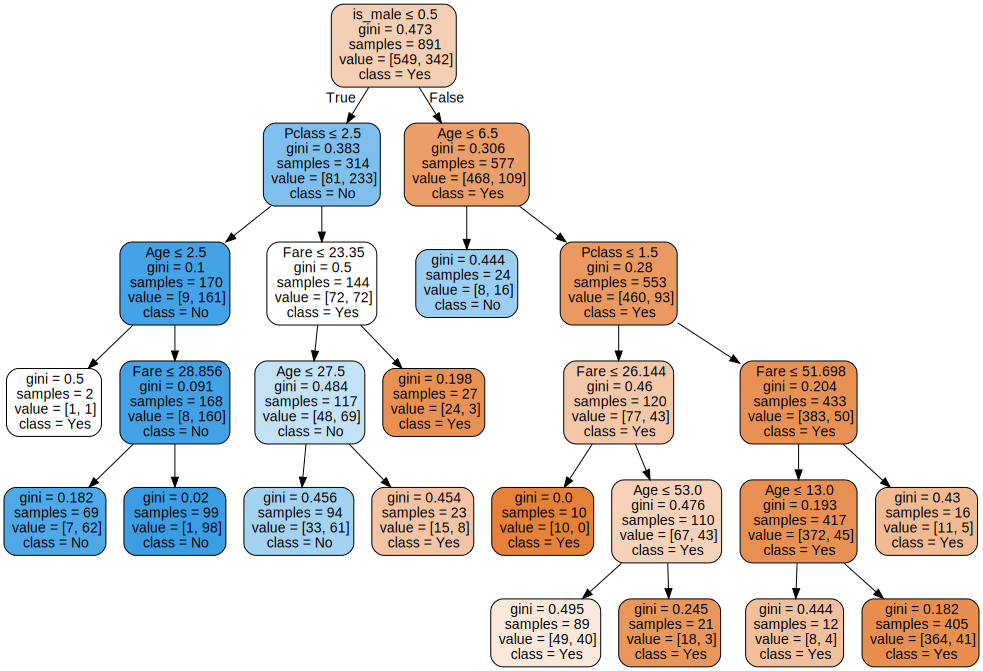

In [6]:
import graphviz
targ_names = ['Yes','No']

data = tree.export_graphviz(dt1,out_file=None,feature_names=features,class_names=targ_names,   
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(data)
graph

In [7]:
# targ_names = ['Yes','No']

# data = export_graphviz(dt2,out_file=None,feature_names=features,class_names=targ_names,   
#                          filled=True, rounded=True,  
#                          special_characters=True)
# graph = graphviz.Source(data)
# graph

In [8]:
# y_pred=dt1.predict(X_TEST)

# Part 2:: Visualization

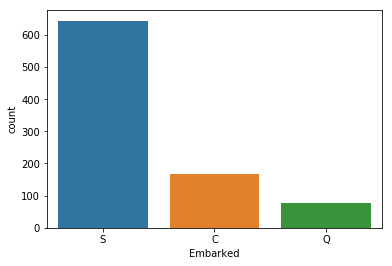

In [9]:
TRAIN_DATA.head()
# plt.figure(figsize=(10,6))
sns.countplot(x='Embarked', data=TRAIN_DATA)

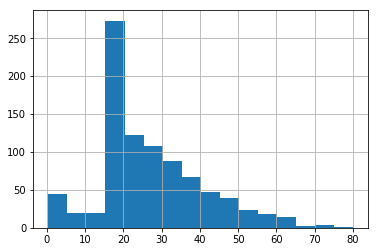

In [10]:
TRAIN_DATA['Age'].hist(bins=16)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.037581 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.040591 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.366914  0.083081  0.018443   
Age             0.037581 -0.040591 -0.366914  1.000000 -0.228359 -0.136317   
SibSp          -0.057527 -0.035322  0.083081 -0.228359  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.136317  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.116500  0.159651  0.216225   
is_male         0.042939 -0.543351  0.131900  0.064894 -0.114631 -0.245489   
Embarked_C     -0.001205  0.168240 -0.243292  0.021197 -0.059528 -0.011069   
Embarked_Q     -0.033606  0.003650  0.221009 -0.109581 -0.026354 -0.081228   
Embarked_S      0.022148 -0.155660  0.081720  0.042043  0.070941  0.063036   

                 Fare   is_male  Embarked_C  Embarked_Q  Embark

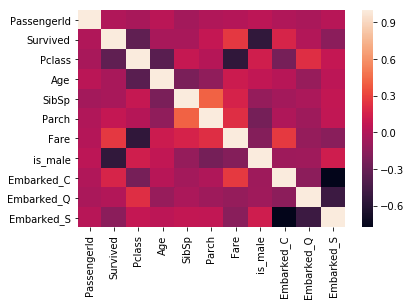

In [11]:
corr=TRAIN_DATA.corr()
print(corr)
sns.heatmap(corr)

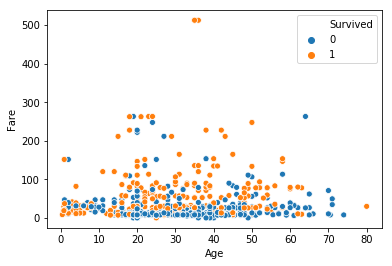

In [12]:
sns.scatterplot(x=TRAIN_DATA['Age'], y=TRAIN_DATA['Fare'], hue=TRAIN_DATA['Survived'])

# Part 3:: Clustering

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=30)

columns = ['Age', 'Fare']
kmeans.fit(X[columns])
y_kmeans = kmeans.predict(X[columns])


In [14]:
#y_kmeans


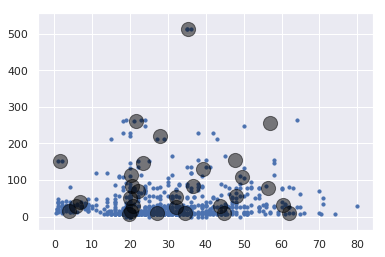

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.datasets.samples_generator import make_blobs

plt.scatter(X['Age'], X['Fare'],  s=10)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

